In [1]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import Data File and Read
crime = "Cleaned_Crime_Data.csv"
crime_df = pd.read_csv(crime)

In [3]:
# Drop Indexed Column from Previous Files
del crime_df["Unnamed: 0"]
crime_df

,State,City,Year,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson
0,ALABAMA,HUNTSVILLE,2015,190106,723,5,65,173,480,4121,836,2903,382,0
1,ALASKA,ANCHORAGE,2015,301239,1615,16,323,271,1005,5732,811,4516,405,63
2,ARIZONA,CHANDLER,2015,258875,206,0,26,51,129,2524,384,2033,107,26
3,ARIZONA,GILBERT,2015,247324,95,2,14,14,65,1628,253,1310,65,12
4,ARIZONA,MESA,2015,471034,1019,6,142,219,652,5995,1041,4591,363,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,WASHINGTON,SPOKANE,2018,217066,791,4,179,105,503,7371,958,5616,797,19
1078,WASHINGTON,TACOMA,2018,213504,950,7,84,257,602,5641,963,3674,1004,46
1079,WASHINGTON,VANCOUVER,2018,176884,402,2,87,70,243,2876,393,1981,502,20
1080,WISCONSIN,GREEN BAY,2018,105331,243,1,40,25,177,810,106,657,47,3


In [4]:
# Change Formatting for Specific Columns
cols = ["Violent Crime", "Murder", "Rape", "Robbery", "Assault", "Property", "Burglary", "Larceny", "MV Theft", "Arson"]

# Format Float Values
crime_df[cols] = crime_df[cols].astype(float)
pd.options.display.float_format = '{:.0f}'.format

In [5]:
crime_df = crime_df.astype({"Violent Crime": int, "Murder": int, "Rape": int, "Robbery": int, "Assault": int, "Property": int,
                           "Burglary": int, "Larceny": int, "MV Theft": int, "Arson": int})

In [6]:
# Specify columns to analyze
cols2 = ["Year", "Population", "Violent Crime", "Murder", "Rape", "Robbery", "Assault", "Property", "Burglary", "Larceny",
         "MV Theft", "Arson"]

# Create copy to not change original df
nat_stats = crime_df.copy()

# Summation for national statistics
year_national = nat_stats.groupby("Year")[cols2].sum()

In [7]:
# Change "Year" Column
year_national = pd.DataFrame(year_national)
year_national["Year"] = year_national["Year"].replace([531960, 532224, 558709, 558986], [2015, 2016, 2017, 2018])
year_national

,Year,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson
Year,,,,,,,,,,,,
2015,2015,82154806,246421,3260,19688,80543,142930,1278070,235646,893047,149377,7893
2016,2016,82154806,261371,3523,20943,83184,153721,1279130,226178,895806,159554,7434
2017,2017,87089545,275136,3955,23730,86416,166470,1345750,232191,943107,173054,8052
2018,2018,87089545,264382,3627,24627,76748,164114,1285536,208459,909777,168176,7233


In [8]:
# Total All Crimes per Year
year_national["Total"] = pd.Series([0 for x in range(len(year_national.index))])
year_national["Total"] = year_national[cols].sum()
year_national

,Year,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson,Total
Year,,,,,,,,,,,,,
2015,2015,82154806,246421,3260,19688,80543,142930,1278070,235646,893047,149377,7893,nan
2016,2016,82154806,261371,3523,20943,83184,153721,1279130,226178,895806,159554,7434,nan
2017,2017,87089545,275136,3955,23730,86416,166470,1345750,232191,943107,173054,8052,nan
2018,2018,87089545,264382,3627,24627,76748,164114,1285536,208459,909777,168176,7233,nan


Text(0, 0.5, 'Murder Counts in the US')

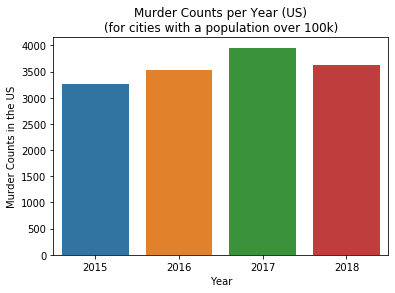

In [20]:
# Create Bar Graph to Show Counts of National Data
sns.barplot(x="Year", y="Murder", data=year_national)
plt.title("Murder Counts per Year (US)\n(for cities with a population over 100k)")
plt.ylabel("Murder Counts in the US")

In [9]:
# Find Murder Capital
m_cap = nat_stats.loc[nat_stats.groupby("Year")["Murder"].max()]
m_cap

,State,City,Year,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson
213,TEXAS,BROWNSVILLE,2015,184941,239,1,24,76,138,3700,501,3124,75,9
317,CALIFORNIA,RIALTO,2016,103590,254,2,9,84,159,946,301,290,355,1
331,CALIFORNIA,SANTA ROSA,2016,175738,333,4,48,58,223,1714,298,1192,224,11
253,WASHINGTON,EVERETT6,2015,107633,191,4,19,65,103,3040,477,2156,407,20


In [10]:
# Create copy to not change original df
state_stats = crime_df.copy()

# Summation for state statistics
year_state = state_stats.groupby(["State", "Year"]).sum()

year_state

Population  Violent Crime  Murder  Rape  Robbery  Assault  \
State      Year                                                              
ALABAMA    2015      190106            723       5    65      173      480   
           2016      190106            876      10    80      213      573   
           2017      760832           3638      85   202      963     2388   
           2018      760832           3610      77   201      806     2526   
ALASKA     2015      301239           1615      16   323      271     1005   
...                     ...            ...     ...   ...      ...      ...   
WASHINGTON 2018     1814022           5146      32   591     1457     3066   
WISCONSIN  2015     1054390           5076      78   299     1855     2844   
           2016     1054390           5207      60   346     1718     3083   
           2017      361181            688       7    78      135      468   
           2018      361181            759       4    95      118      542   

                 Property  Burglary  Larceny  MV Theft  Arson  
State      Year                                                
ALABAMA    2015      4121       836     2903       382      0  
           2016      4565       881     3279       405      0  
           2017     19164      4223    13031      1910    148  
           2018     18497      3796    12657      2044    100  
ALASKA     2015      5732       811     4516       405     63  
...                   ...       ...      ...       ...    ...  
WASHINGTON 2018     45055      7669    31521      5865    165  
WISCONSIN  2015     16805      3470    10113      3222    125  
           2016     16542      3157    10182      3203    133  
           2017      4163       572     3402       189     12  
           2018      3723       518     2917       288      8  

[180 rows x 11 columns]

In [11]:
grouped_total = crime_df.copy()
grouped_total["Total"] = ""
grouped_total["Total"] = grouped_total[cols].sum(axis=1)
grouped_total

,State,City,Year,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property,Burglary,Larceny,MV Theft,Arson,Total
0,ALABAMA,HUNTSVILLE,2015,190106,723,5,65,173,480,4121,836,2903,382,0,9688
1,ALASKA,ANCHORAGE,2015,301239,1615,16,323,271,1005,5732,811,4516,405,63,14757
2,ARIZONA,CHANDLER,2015,258875,206,0,26,51,129,2524,384,2033,107,26,5486
3,ARIZONA,GILBERT,2015,247324,95,2,14,14,65,1628,253,1310,65,12,3458
4,ARIZONA,MESA,2015,471034,1019,6,142,219,652,5995,1041,4591,363,40,14068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,WASHINGTON,SPOKANE,2018,217066,791,4,179,105,503,7371,958,5616,797,19,16343
1078,WASHINGTON,TACOMA,2018,213504,950,7,84,257,602,5641,963,3674,1004,46,13228
1079,WASHINGTON,VANCOUVER,2018,176884,402,2,87,70,243,2876,393,1981,502,20,6576
1080,WISCONSIN,GREEN BAY,2018,105331,243,1,40,25,177,810,106,657,47,3,2109


In [ ]:
grouped_total.to_csv("Grouped.csv")